In [38]:
import keras

# Ensure to set the image data format appropriately
K = keras.backend.backend()
current_format = keras.backend.image_data_format()
print("Current Image Data Format:", current_format)

if K == 'tensorflow':
    keras.backend.set_image_data_format('channels_last')
else:
    keras.backend.set_image_data_format('channels_first')

Current Image Data Format: channels_last


In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, model_to_dot
from keras.preprocessing import sequence

from keras import backend as K
from IPython.display import SVG, display
from keras.utils import plot_model, model_to_dot

In [40]:
img_rows, img_cols = 32, 32
img_channels = 3

batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2

# Updated part for image data format
if K.image_data_format() == 'channels_first':
    print("sdsdsd")
    input_shape = (img_channels, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, img_channels)
    print("rrrr")
    
# Loading the CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert and normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

rrrr
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [41]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Flatten(),
]
classification_layers = [
    Dense(512),
    Activation('relu'),
    Dense(nb_classes),
    Activation('softmax')
]

In [42]:
# create complete model
model = Sequential(feature_layers + classification_layers)

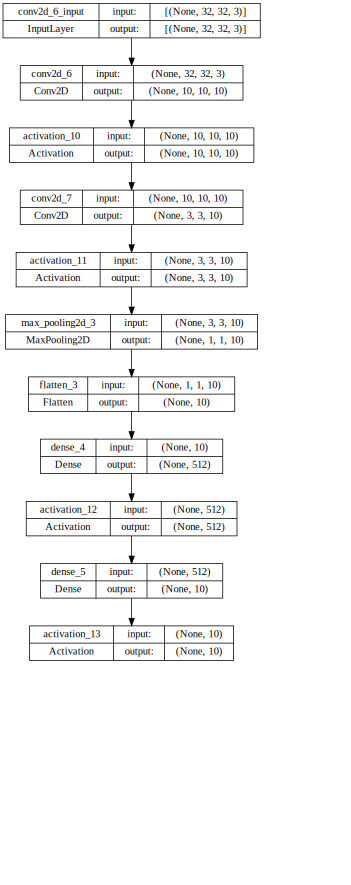

In [43]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [44]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 10, 10, 10)        280       
                                                                 
 activation_10 (Activation)  (None, 10, 10, 10)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 activation_11 (Activation)  (None, 3, 3, 10)          0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 10)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 10)                0         
                                                      

In [45]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=nb_epoch, batch_size=batch_size, verbose=2)

Epoch 1/4


2023-12-15 11:15:19.352219: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


196/196 - 1s - loss: 2.3032 - accuracy: 0.1038 - val_loss: 2.3032 - val_accuracy: 0.1062 - 1s/epoch - 7ms/step
Epoch 2/4
196/196 - 1s - loss: 2.3032 - accuracy: 0.1045 - val_loss: 2.3032 - val_accuracy: 0.1061 - 668ms/epoch - 3ms/step
Epoch 3/4
196/196 - 1s - loss: 2.3031 - accuracy: 0.1046 - val_loss: 2.3031 - val_accuracy: 0.1061 - 670ms/epoch - 3ms/step
Epoch 4/4
196/196 - 1s - loss: 2.3030 - accuracy: 0.1052 - val_loss: 2.3031 - val_accuracy: 0.1062 - 653ms/epoch - 3ms/step


**Visualization of layers**

In [46]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)

***Input layer (original image)***

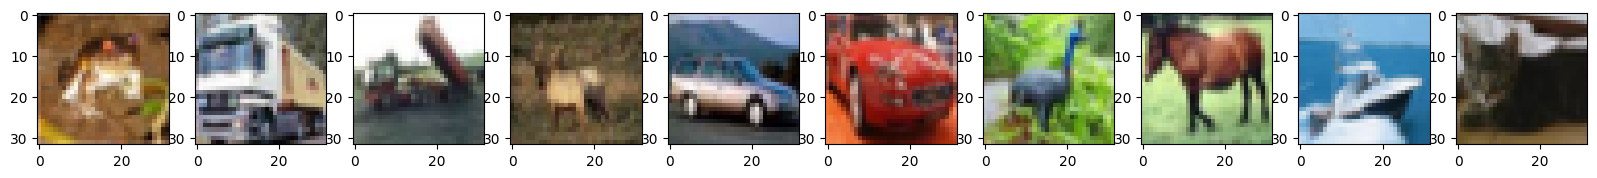

In [49]:
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i], 1, show_size, i+1)
plt.show()

***First layer***

In [54]:
get_first_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
get_first_layer_output([X_train[0:show_size]])

[array([[[[3.10092773e-02, 0.00000000e+00, 8.23756456e-02, ...,
           6.64270669e-02, 0.00000000e+00, 5.31393327e-02],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           1.36966333e-01, 0.00000000e+00, 9.25092325e-02],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           6.88559860e-02, 0.00000000e+00, 2.69241840e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           4.86832522e-02, 0.00000000e+00, 2.09927619e-01],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           1.15166813e-01, 0.00000000e+00, 2.55953759e-01],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           7.56285042e-02, 0.00000000e+00, 2.77328014e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           4.66517508e-02, 0.00000000e+00, 5.57982251e-02],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 2.07954

In [56]:
first_layer = get_first_layer_output([X_train[0:show_size]])[0]
first_layer

array([[[[3.10092773e-02, 0.00000000e+00, 8.23756456e-02, ...,
          6.64270669e-02, 0.00000000e+00, 5.31393327e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.36966333e-01, 0.00000000e+00, 9.25092325e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.88559860e-02, 0.00000000e+00, 2.69241840e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.86832522e-02, 0.00000000e+00, 2.09927619e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.15166813e-01, 0.00000000e+00, 2.55953759e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          7.56285042e-02, 0.00000000e+00, 2.77328014e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.66517508e-02, 0.00000000e+00, 5.57982251e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.07954049e-01],
        

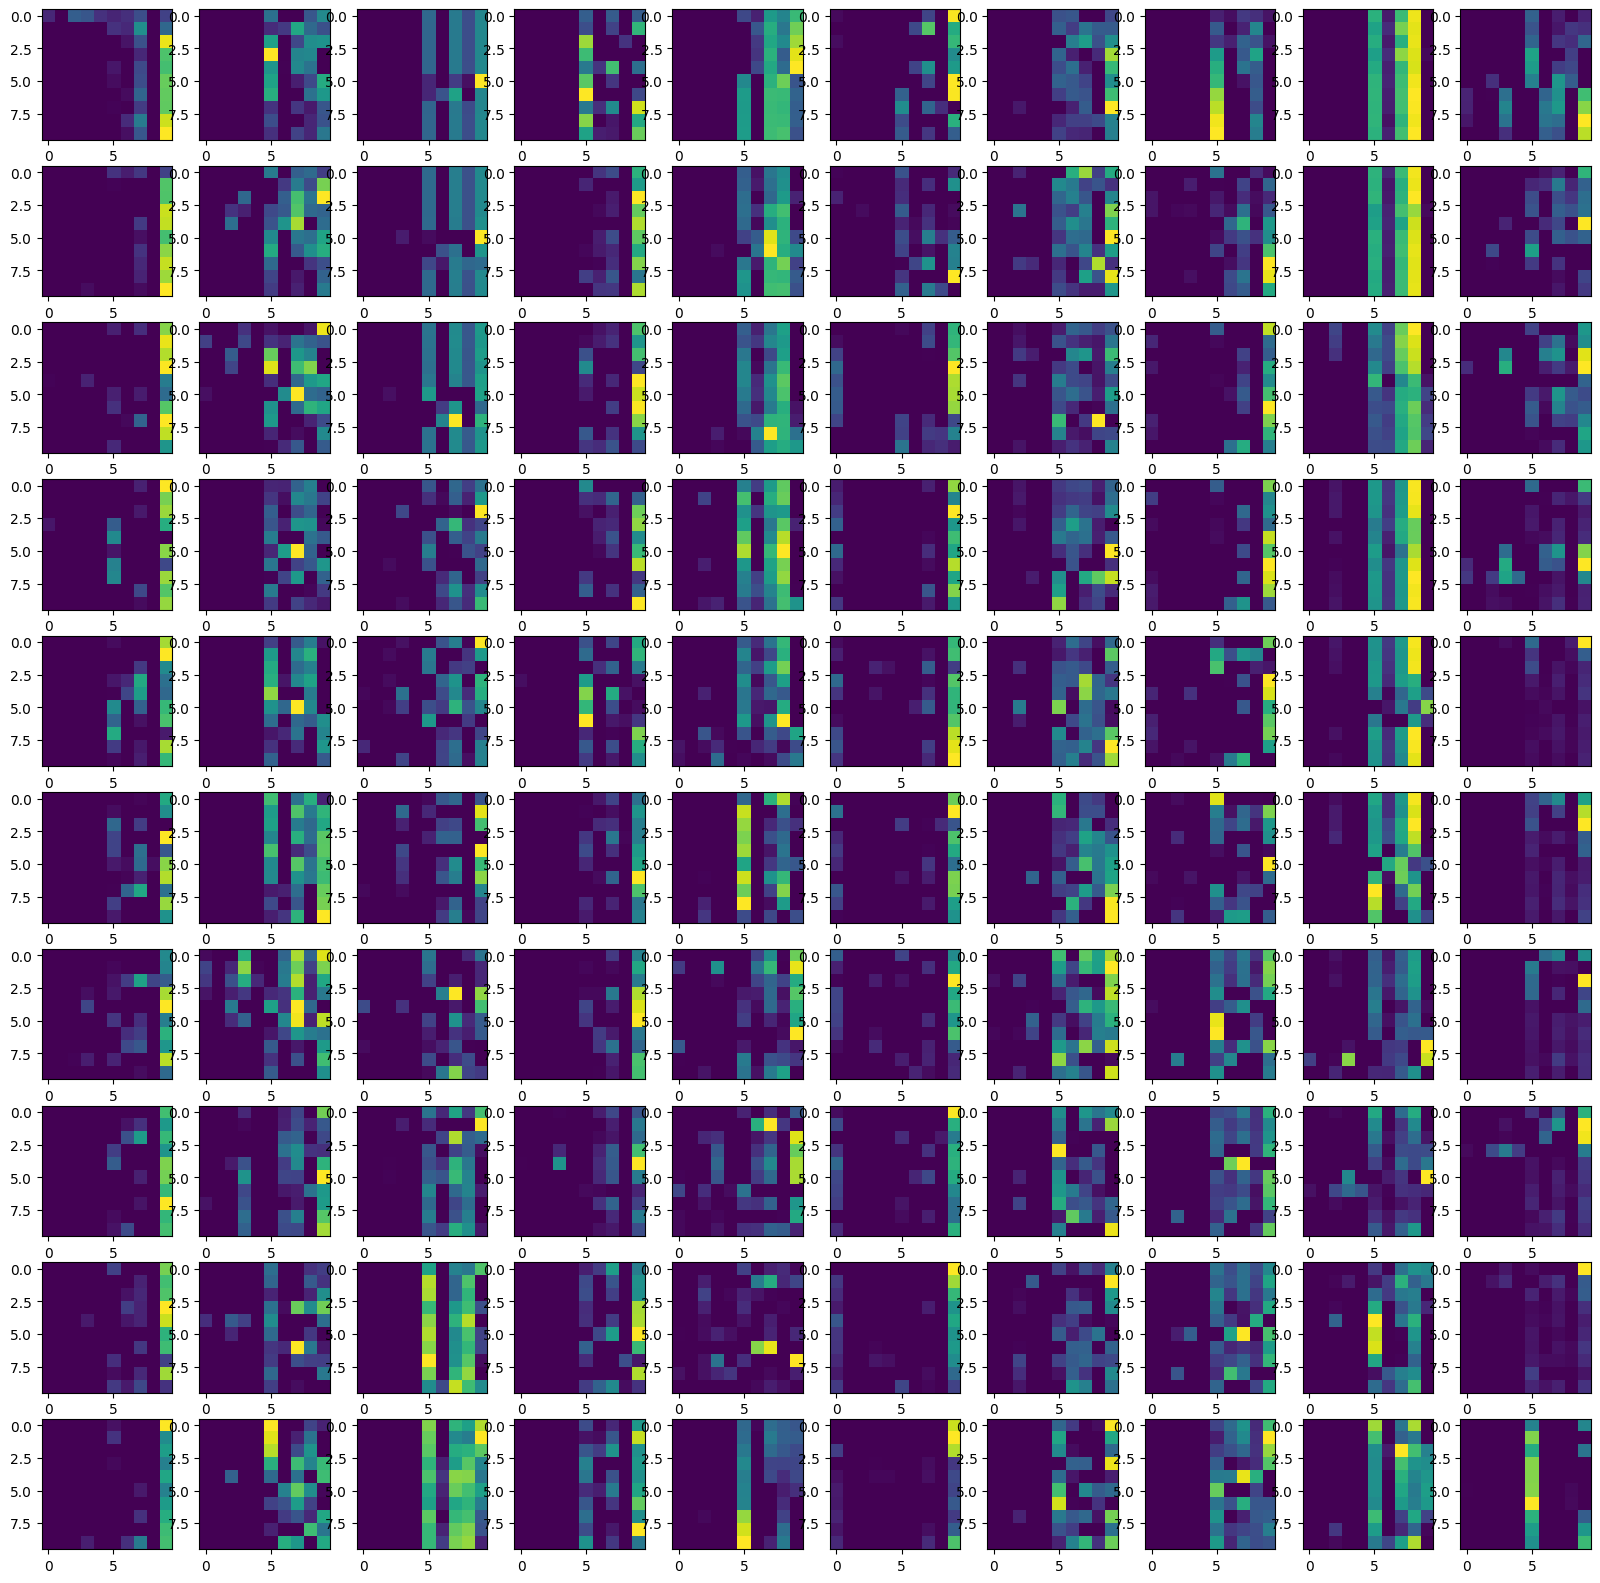

In [57]:
plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

***Second layer***

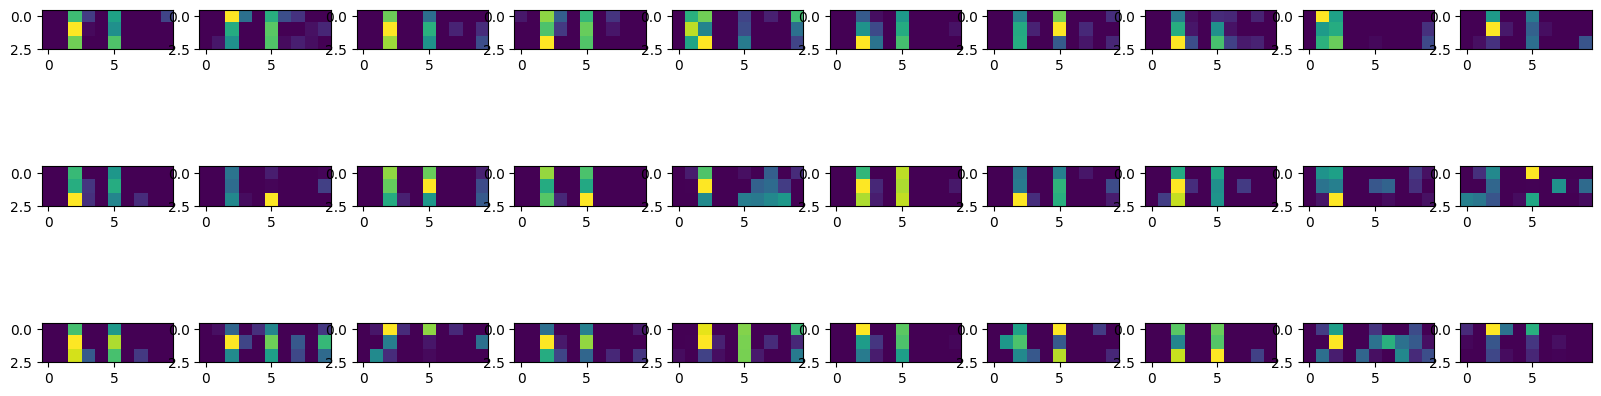

In [58]:
get_second_layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(second_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

***Third layer***

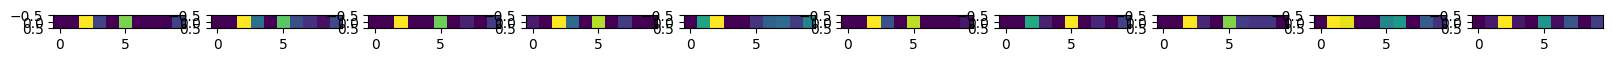

In [59]:
get_third_layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filters, show_size, pos)
plt.show()